In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Setting up directories for training, validation, and testing datasets and preprocessing them
train_dir = '../data/train'
test_dir = '../data/test'
val_dir = '../data/val'

# For training: add augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,      # randomly rotate images up to 15 degrees
    width_shift_range=0.1,  # shift images horizontally up to 10%
    height_shift_range=0.1, # shift images vertically up to 10%
    shear_range=0.01,
    zoom_range=0.1,         # zoom in by up to 10%
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'
)

# For validation and test: only rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary'
)



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
# Defining the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [5]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size)


Epoch 1/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 151s 916ms/step - accuracy: 0.7575 - loss: 0.5717 - val_accuracy: 0.8125 - val_loss: 0.6079
Epoch 2/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 612ms/step - accuracy: 0.8507 - loss: 0.3300 - val_accuracy: 0.6875 - val_loss: 0.6045
Epoch 3/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 601ms/step - accuracy: 0.8781 - loss: 0.2856 - val_accuracy: 0.7500 - val_loss: 0.7338
Epoch 4/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 597ms/step - accuracy: 0.8896 - loss: 0.2795 - val_accuracy: 0.8750 - val_loss: 0.5452
Epoch 5/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 590ms/step - accuracy: 0.9024 - loss: 0.2560 - val_accuracy: 0.8125 - val_loss: 0.7759
Epoch 6/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9112 - loss: 0.2444 - val_accuracy: 0.7500 - val_loss: 0.7350
Epoch 7/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 614ms/step - accuracy: 0.9128 - loss: 0.2464 - val_accuracy: 0.7500 - val_loss: 0.8442
Epoch 8/15
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 585ms/step - accuracy: 0.9168 - los

Label: 1.0


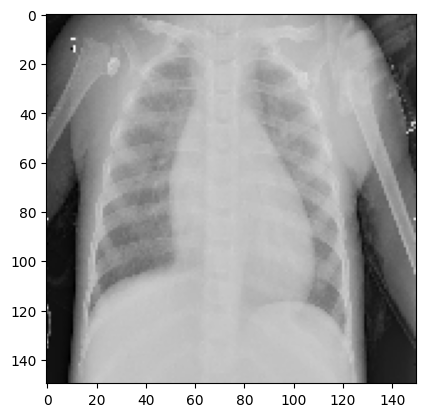

In [ ]:
# Evaluating the model
import matplotlib.pyplot as plt
img, label = next(train_generator)
plt.imshow(img[0])
print('Label:', label[0])  # 0 or 1
